# Start

In [1]:
import tbmodels
from yambopy import *
import matplotlib.pyplot as plt
from yambopy.lattice import car_red, red_car
import matplotlib.pylab as pylab
from pylab import rcParams
from matplotlib.ticker import MultipleLocator
import matplotlib.lines as mlines
import scienceplots
plt.style.use(['science'])
WORK_PATH='/Users/Reho0001/workQE/StevenBos'

In [2]:
# Istance of useful classes
NK = 6
NQ = 6
lat_k = YamboLatticeDB.from_db_file(f'{WORK_PATH}/BSE/SAVE/')
lat_q = YamboLatticeDB.from_db_file(f'{WORK_PATH}/BSE/SAVE/')
# lat_q.expand_kpoints()
# lat_k.expand_kpoints()


In [3]:
from yambopy.wannier.wann_Mssp import *

In [4]:
from yambopy.wannier.wann_io import MMN, NNKP

nnkp = NNKP(seedname=f'{WORK_PATH}/nscf-wannier-6x6x6/LiF')
mmn = MMN(seedname=f'{WORK_PATH}/nscf-wannier-6x6x6/LiF')

Time for NNKP.__init__() : 0.012822151184082031
Time for MMN.__init__() : 6.6972270011901855 , read : 6.681618928909302 , headstring 0.015608072280883789


In [5]:
# Try for 2nd band only 
wfdb = YamboWFDB(path=f'{WORK_PATH}/nscf-wannier-6x6x6/LiF.save/',latdb=lat_k, bands_range=[0,10])


216 kpoints expanded to 216


Loading Wavefunctions:  85%|████████▌ | 184/216 [00:00<00:00, 254.55it/s]

Loading Miller Indices: 100%|██████████| 216/216 [00:00<00:00, 13460.26it/s]


In [6]:
from yambopy.wannier.wann_Mssp import compute_overlap_kkpb
# nnkp coming directly from wannier90 to get the indices of the k and k+b and the Gvec if applicable
# NOTE: Now there is a discrepancy, namely the kpoint indices from wannier90 are used in the yambopy wfDB
# The yambopy wfdb has the kpoint order/convention of yambo thanks to p2y, however the apparently the wavefunctions that are read
# are not in that yambo kpoint convention, or how could we otherwise get the correct result when comparing to wannier90? 
Mkpb = compute_overlap_kkpb(wfdb,nnkp)


Expanding Wavefunctions full BZ: 100%|██████████| 216/216 [00:00<00:00, 3402.64it/s]



#       LiF MMn
Compare to the Mmn file from wannier90

In [7]:
np.count_nonzero(np.round(mmn.data - Mkpb,10))

0

# H2P initialization

In [17]:

# Create instance of real space Hamiltonian in MLWF basis
hrk=HR(f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF')
hrq = HR(f'{WORK_PATH}/nscf-wannier-{NQ}x{NQ}x{NQ}/LiF')
original_nnkp = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}//LiF')

nnkp_kgrid = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}//LiF')
nnkp_qgrid = NNKP_Grids(f'{WORK_PATH}/nscf-wannier-{NQ}x{NQ}x{NQ}//LiF')
print('start grids')
# We need all these auxiliary grids for wannierization of the BSE Hamiltonian
# nnkp_kgrid.get_kpbover2_grid(nnkp_kgrid)
nnkp_kgrid.get_wannier90toyambo(lat_k,yambo=False)
nnkp_qgrid.get_wannier90toyambo(lat_q,yambo=False)

nnkp_qgrid.get_qpb_grid(nnkp_qgrid)
nnkp_kgrid.get_kpb_grid(nnkp_kgrid)
nnkp_kgrid.get_kmq_grid(nnkp_qgrid)


Time for HR.__init__() : 0.012581110000610352 , read : 0.011579036712646484 , headstring 0.0010020732879638672
Time for HR.__init__() : 0.010714054107666016 , read : 0.010120868682861328 , headstring 0.0005931854248046875
Time for NNKP.__init__() : 0.011568784713745117
Time for NNKP.__init__() : 0.012631893157958984
Time for NNKP.__init__() : 0.013061046600341797
start grids


(array([[[-0.        ,  0.        ,  0.        ],
         [-0.        ,  0.        , -0.16666667],
         [ 0.16666667,  0.16666667,  0.16666667],
         ...,
         [ 0.33333333, -0.16666667,  0.5       ],
         [ 0.5       ,  0.66666667,  0.16666667],
         [-0.5       , -0.66666667, -0.16666667]],
 
        [[-0.        ,  0.        ,  0.16666667],
         [-0.        ,  0.        ,  0.        ],
         [ 0.16666667,  0.16666667,  0.33333333],
         ...,
         [-0.66666667, -0.16666667, -0.33333333],
         [ 0.5       ,  0.66666667,  0.33333333],
         [-0.5       ,  0.33333333,  0.        ]],
 
        [[-0.16666667, -0.16666667, -0.16666667],
         [-0.16666667, -0.16666667, -0.33333333],
         [-0.        ,  0.        ,  0.        ],
         ...,
         [ 0.16666667, -0.33333333,  0.33333333],
         [ 0.33333333, -0.5       ,  0.        ],
         [ 0.33333333,  0.16666667, -0.33333333]],
 
        ...,
 
        [[-0.33333333,  0.16666667

In [18]:
model = TBMODEL.from_wannier_files(
    hr_file=f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF_hr.dat',
    wsvec_file=f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    win_file=f'{WORK_PATH}/nscf-wannier-{NK}x{NK}x{NK}/LiF.win'
)
model.set_mpgrid(nnkp_kgrid)

fermie = 1.0
model.solve_ham_from_hr(lat_k, hrk, fermie=fermie)

print ('before h2p')
h2p = H2P(model, electronsdb_path = f'{WORK_PATH}/BSE/SAVE', kmpgrid=nnkp_kgrid,qmpgrid=nnkp_qgrid,bse_nv=3,bse_nc=1,
          cpot=None,kernel_path=f'{WORK_PATH}/BSE/',
          excitons_path=f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/',TD=False, method='skip-diago',run_parallel=True,dimslepc=10)

print('built h2p')
#if (not method=='skip-diago'):
#h2p.solve_H2P()
#h2p.convert_to_wannier90()
print('writing files')

Diagonalization took 0.018 s
before h2p
216 kpoints expanded to 216
216 kpoints expanded to 216
Method skip-diago running. Remember to set dimslepc
Using the Full Brillouin zone.
Reading excitonic eigenvalues and eigenvectors in 1.60 seconds.
built h2p
writing files


In [19]:
h2p.h2peigvec, h2p.h2peigvec_vck = h2p.fix_and_align_phases()

*** Fixed global and relative phases across Q ***


In [12]:
h2p.Mkmq = compute_overlap_kmq(wfdb,nnkp_kgrid)

/Users/Reho0001/opt/anaconda3/envs/yambopy-test/lib/python3.12/site-packages/yambopy/wannier/wann_Mssp.py:22: SyntaxWarning: invalid escape sequence '\k'
  '''\bra{u_{v'k-Q}}\ket{u_{vk-Q}}
/Users/Reho0001/opt/anaconda3/envs/yambopy-test/lib/python3.12/site-packages/yambopy/wannier/wann_Mssp.py:51: SyntaxWarning: invalid escape sequence '\k'
  '''\bra{u_{ck}}\ket{u_{c'k+ B}}


KeyboardInterrupt: 

In [13]:
h2p.Mkpb = Mkpb

In [14]:
h2p.Mssp = None
h2p.Amn = None
t = 3

In [10]:
h2p.Mssp = compute_Mssp(h2p,nnkp_kgrid,nnkp_qgrid,trange=t)

NameError: name 't' is not defined

# Write overlaps

In [ ]:
t=3
tp=t

h2p.write_exc_overlap(seedname='LiF',trange=np.arange(0,t), tprange=np.arange(0,tp),alpha=1.0)
h2p.write_exc_eig(seedname='LiF',trange=np.arange(0,t))
h2p.write_exc_nnkp(seedname='LiF',trange=np.arange(0,t))


In [25]:
h2p.check_hermitian(h2p.Mssp)

Hermitian deviation: -4.788e-16-1.978e+00j


# Omega

In [17]:
def omega_I(Mssp,norm=1,):
    '''Calculate Omega I as in the electronic case'''
    sum_o_I = 0

    nt,ntp, nq, nb = Mssp.shape
    w_b = 1.894212
    for bi in range(nb):
        for qi in range(nq):
            sum_ms2 = 0
            for s1 in range(nt):
                for s2 in range(ntp):
                    sum_ms2+= np.abs(Mssp[s1,s2,qi,bi]*norm)**2
            sum_o_I+= w_b*(nt-sum_ms2)

    return 1/nq * sum_o_I

In [18]:
rec_lat = [[-1.541317 , -1.541317  , 1.541317],
[ 1.541317 ,  1.541317  , 1.541317],
[-1.541317 ,  1.541317  ,-1.541317]]

B_vec = np.dot(h2p.kmpgrid.b_list[0], rec_lat)
w_b = 1.894212

def r_n(Mssp, t,norm):
    _,_, nq, nb = Mssp.shape
    r_n_sum = 0 
    for qi in range(nq):
        for bi in range(nb):
            
            r_n_sum += w_b * B_vec[bi] * (Mssp[t,t, qi,bi]*norm - 1)

    return r_n_sum/nq *1j

def omega_D(Mssp,norm):
    nt,ntp, nq, nb = Mssp.shape
    omega_D_sum = 0
    r_n_sum = np.zeros(shape=(nt,3),dtype=complex)

    for t in range(nt):
        r_n_sum[t] = r_n(Mssp,t=t, norm=norm)

    for qi in range(nq):
        for bi in range(nb):
            sum_t = 0
            for t in range(nt):
                sum_t += (-np.imag(np.log(Mssp[t,t,qi,bi]*norm)) - np.dot(B_vec[bi],r_n_sum[t]))**2
            omega_D_sum+=w_b*sum_t

    return omega_D_sum/nq

In [19]:
def omega_OD(Mssp,norm=1):
    nt,ntp, nq, nb = Mssp.shape
    omega_summed_OD = 0
    for qi in range(nq):
        for bi in range(nb):
            summed_m = 0
            for t in range(nt):
                for tp in range(ntp):
                    if t is not tp:
                        summed_m+=np.abs(Mssp[t,tp,qi,bi]*norm)**2
            omega_summed_OD+=summed_m*w_b
            
    return omega_summed_OD/nq

In [20]:
def arcos2_omega(Mssp, norm=1):
    """
    Calculate the arccosine squared omega value.
    
    Parameters:
        Mssp: ndarray
            Shape (nt, ntp, nq, nb)
        norm: float
            Normalization factor
        
    Returns:
        float: arccosine squared omega value
    """
    omega_sum = 0

    nt,ntp, nq, nb = Mssp.shape
    w_b = 1.894212
    for s1 in range(nt):
        for s2 in range(ntp):

            for qi in range(nq):
                for bi in range(nb):
                    omega_sum+= w_b*np.arccos(np.abs(Mssp[s1,s2,qi,bi]*norm))**2

    return 1/nq * omega_sum
    # return np.arccos(omega_sum / (nq * nt * ntp)) ** 2

In [21]:

normie=h2p.ntransitions*3
normie=1


print(f"Omega_I = {omega_I(h2p.Mssp, norm=normie)}")
print(f"Omega_D = {omega_D(h2p.Mssp, norm=normie)}")
print(f"Omega_OD = {omega_OD(h2p.Mssp, norm=normie)}")
print(f"arcos^2 = {arcos2_omega(h2p.Mssp, norm=normie)}")

Omega_I = 45.18040751651788
Omega_D = (150.607911742489+0.004834809633838964j)
Omega_OD = 0.1262480076157026
arcos^2 = 321.59497703940104


In [24]:
def G_k(Mssp,q):
    """ Only works for 1 band case, should vanish for each q """
    nt,ntp, nq, nb = Mssp.shape
    G_k_sum = 0
    for bi in range(nb):
        G_k_sum+=w_b*np.imag(np.log(Mssp[0,0,q,bi]))
    return G_k_sum*4j

In [25]:
h2p.Mssp.shape

(3, 3, 216, 8)

In [26]:
G_k(h2p.Mssp,0)

np.complex128(5.036168789923277j)

# Build Excitonic model

Time for HR.__init__() : 0.002853870391845703 , read : 0.0026581287384033203 , headstring 0.0001957416534423828
Diagonalization took 0.009 s


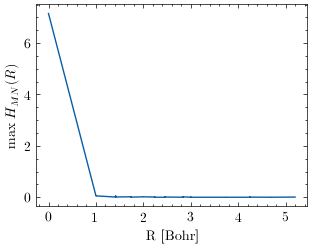

In [31]:
exc_path = WORK_PATH+'/exc_6x6x6/'
model_exc = TBMODEL.from_wannier_files(
    hr_file=f'{exc_path}/LiF_exc_hr.dat',
    # wsvec_file=f'{exc_path}/LiF_exc_wsvec.dat',
    #xyz_file=f'{WORK_PATH}/w90files/hBN_centres.xyz',
    # win_file=f'{exc_path}/LiF_exc.win'
)
model_exc.set_mpgrid(nnkp_kgrid)
lat_exc = YamboLatticeDB.from_db_file(f'{WORK_PATH}/BSE/SAVE/')
# Create instance of real space Hamiltonian in MLWF basis
hr_exc=HR(f'{exc_path}/LiF_exc')

fermie = 1.0
model_exc.solve_ham_from_hr(lat_exc, hr_exc, fermie=fermie  )

R_dist, max_hr_p=model_exc.decay_R(lat_exc.lat, hr_exc,fermie = 3.0)

In [10]:
from qepy.lattice import calculate_distances
# Define path in reduced coordinates using Class Path
npoints =23
path_kpoints = Path([
              [[0.5,0.5,  0.5],'L'],  
              [[  0.0,  0.0,  0.0],'$\Gamma$'],
              [[  0.5,  0.0,  0.5],'X'],
              [[  0.5,  0.250,  0.750],'W'],
              [[  0.5,  0.50,  0.50],'L']
              ],[npoints+2,npoints+10,npoints-11,npoints-1] )
# Generate list of q-points with weights
klist = path_kpoints.get_klist()
kpoints_dists = calculate_distances(klist[:,:3])

<>:6: SyntaxWarning: invalid escape sequence '\G'
<>:6: SyntaxWarning: invalid escape sequence '\G'
/var/folders/hx/z4tmr0ln4bdct36z3dr7ppt80000gp/T/ipykernel_31258/3381356124.py:6: SyntaxWarning: invalid escape sequence '\G'
  [[  0.0,  0.0,  0.0],'$\Gamma$'],


/Users/Reho0001/opt/anaconda3/envs/yambopy-test/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Exciton energy (eV)')

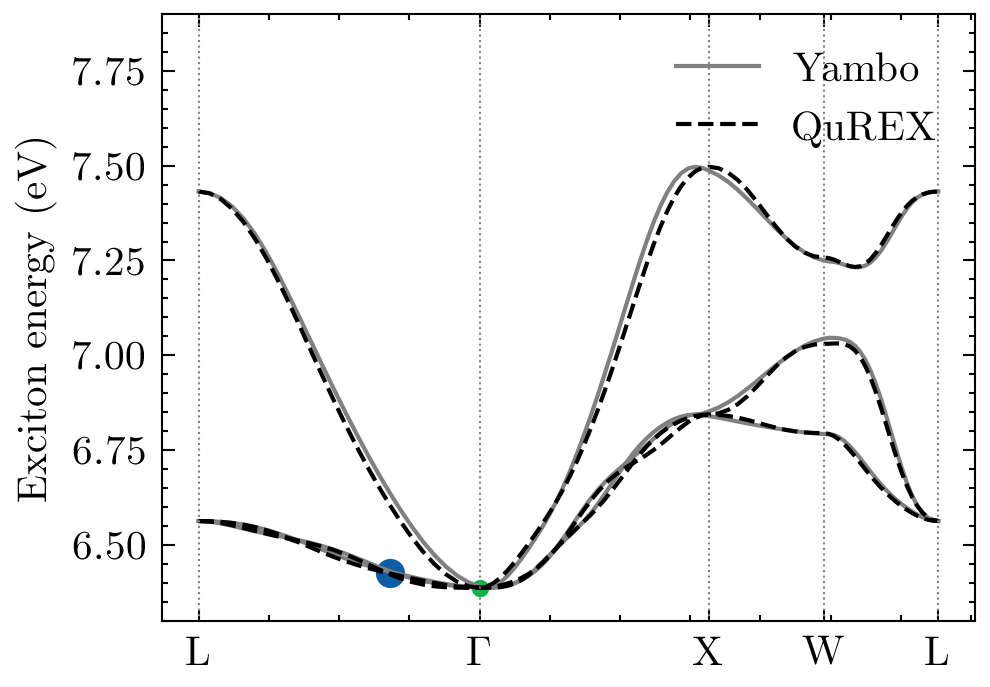

In [34]:
plt.figure(dpi=300)
bands_path = f"/Users/Reho0001/workQE/Projects/LiF/July2024/Optics/yambo-DS/6x6x6/exc-bands_triplet/o-exc-bands.excitons_interpolated"

excbands = np.loadtxt(bands_path,usecols=(0,1,2,3))
k_yambo = excbands[:,0]
exc_e = excbands[:,1:] 
plt.plot(kpoints_dists, exc_e[:,:3], label='Yambo', color='grey', linestyle='-')
plt.plot(kpoints_dists, model_exc.eigenval(k=klist[:,:3]), color='black', linestyle='--', label='TB bands')
plt.scatter(kpoints_dists[17], h2p.h2peigv[6][0])
plt.scatter(kpoints_dists[25], h2p.h2peigv[0][0], s=10)


plt.vlines(path_kpoints.distances,ymin=6, ymax=8, color='grey', linestyle=':', linewidth=0.5)
legend_entries = [
    mlines.Line2D([], [], color='grey', ls ='-', label='Yambo'),
    mlines.Line2D([], [], color='black', ls = '--', label='QuREX'),
]
plt.legend(handles=legend_entries, loc='upper right', fontsize=10)
plt.ylim(6.3,7.9)
plt.xticks(path_kpoints.distances, path_kpoints.klabels)
plt.ylabel('Exciton energy (eV)')


# Tests

Text(0.5, 1.0, 'Distribution of |Mssp|')

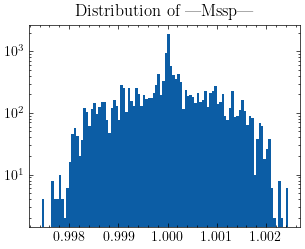

In [ ]:
import matplotlib.pyplot as plt
plt.hist(np.abs(h2p.Mssp/100 + 1).flatten(), bins=100, log=True)
plt.title("Distribution of |Mssp|")


In [ ]:
from scipy.spatial import cKDTree
import numpy as np
import random

def build_periodic_kdtree(kgrid, n_images=1):
    shifts = np.array(np.meshgrid(
        *[np.arange(-n_images, n_images + 1)] * 3)).T.reshape(-1, 3)
    nk = len(kgrid)
    n_shifts = len(shifts)
    kpts_images = (kgrid[:, None, :] + shifts[None, :, :]).reshape(-1, 3)
    origin_indices = np.repeat(np.arange(nk), n_shifts)
    tree = cKDTree(kpts_images)
    return tree, kpts_images, origin_indices

def check_kmq_consistency(kgrid, qgrid, kmq_table, tol=1e-6, ntest_k=10, ntest_q=5, sign="+"):
    nk = kgrid.shape[0]
    nq = qgrid.shape[0]
    failures = []

    random.seed(42)
    ik_list = random.sample(range(nk), min(ntest_k, nk))
    iq_list = random.sample(range(nq), min(ntest_q, nq))

    tree, _, origin_indices = build_periodic_kdtree(kgrid, n_images=1)

    for ik in ik_list:
        k = kgrid[ik]
        for iq in iq_list:
            q = qgrid[iq]
            kmq = (k - q) if sign == "+" else (q - k)

            # Match using periodic KDTree
            _, closest_idx = tree.query(kmq)
            manual_idx = origin_indices[closest_idx]

            # Table-based value
            table_idx = int(kmq_table[ik, iq, 1])

            if np.linalg.norm(kgrid[manual_idx] - kgrid[table_idx]) > tol:
                failures.append((ik, iq, manual_idx, table_idx, kgrid[manual_idx], kgrid[table_idx]))

    if failures:
        print(f"❌ Found {len(failures)} mismatch(es):")
        for f in failures[:10]:
            ik, iq, midx, tidx, mk, tk = f
            print(f"[ik={ik}, iq={iq}] → manual k = {mk}, table k = {tk}")
    else:
        print("✅ All tested kmq table entries are consistent.")


In [ ]:
check_kmq_consistency(
    kgrid=nnkp_kgrid.k,
    qgrid=nnkp_qgrid.k,
    kmq_table=nnkp_kgrid.kmq_grid_table,
    tol=1e-6,
    ntest_k=20,
    ntest_q=20,
    sign="+"
)


✅ All tested kmq table entries are consistent.


# Compute Chern number

# Compute exciton 2D

In [11]:
excdb = YamboExcitonDB.from_db_file(lattice = lat_k, filename=f'{WORK_PATH}/BSE/06_BSE_triplet_slepc/ndb.BS_diago_Q1', folder='.')

[WARNING] Lattice type %s currently not supported for drawing BZ borders


(<Axes: title={'center': '[0, 10]'}>,
 <matplotlib.collections.PathCollection at 0x13c95f9e0>)

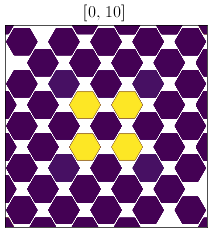

In [12]:
fig,ax = plt.subplots()
excdb.plot_exciton_2D_ax(ax = ax, excitons = [0,10],scale = 450)

In [14]:
yambo_table = h2p.convert_to_yambo_table()

In [15]:
yexcdb = YamboExcitonDB(lattice = lat_k,Qpt=1,eigenvalues=h2p.h2peigv[0],l_residual=h2p.h2peigvec[0],r_residual=h2p.h2peigvec[0] ,spin_pol='no',car_qpoint=None,q_cutoff=None,table=yambo_table,eigenvectors=h2p.h2peigvec[0])

[WARNING] Lattice type %s currently not supported for drawing BZ borders


(<Axes: title={'center': '[0, 10]'}>,
 <matplotlib.collections.PathCollection at 0x13c5c7e00>)

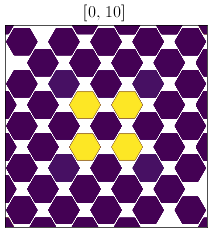

In [20]:
fig,ax = plt.subplots()
yexcdb.plot_exciton_2D_ax(ax = ax, excitons = [0,10],scale = 450)